# Assignment 3
## Cliff Walking

This notebook implements and demonstrates the Cliff Walking problem from Sutton and Barto.

In [28]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from IPython.display import HTML

In [29]:
from envs import CliffWalk
from agents import SarsaAgent, QLearningAgent, ExpectedSarsaAgent

### Training

In [30]:
def train(env, agent, episodes):
    stats = []
    for episode in range(episodes):
        rewards = 0

        state = env.reset()
        action = agent.get_action(state)
        done = False
        while not done:
            next_state, reward, done = env.step(action)
            next_action = agent.get_action(next_state)
            agent.update(state, action, reward, next_state, next_action)
            state = next_state
            action = next_action

            rewards += reward
        stats.append(rewards)
    return stats

### Replay

In [31]:
def replay(history):
    import matplotlib.animation as animation

    fig = plt.figure()
    plt.axis("off")
    im = plt.imshow(history[0], cmap="gray", vmin=0, vmax=1)

    def update(i):
        im.set_array(history[i])
        return im,

    ani = animation.FuncAnimation(fig, update, frames=len(history), interval=100, repeat=True)
    plt.close()
    return ani

In [32]:
def plot_rewards(stats_dict):
    plt.figure(figsize=(20, 10))
    for label, stats in stats_dict:
        stats_running_avg = np.array([np.mean(stats[i:i+100]) for i in range(len(stats)-100)])
        plt.plot(stats_running_avg, label=label)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.ylim(-100, 0)
    plt.legend()
    plt.show()

### Experiment

In [33]:
def run(env, agent, episodes=500):
    stats = train(env, agent, episodes)
    env.reset()

    history = []
    history.append(env.render())

    while True:
        action = agent.get_action(env.state)
        env.step(action)
        history.append(env.render())

        if env.state == env.goal_state:
            break

    return stats, history

#### Cliff Walk

In [34]:
NUM_EPISODES = 2000

ALPHA = 0.5
EPSILON = 0.1

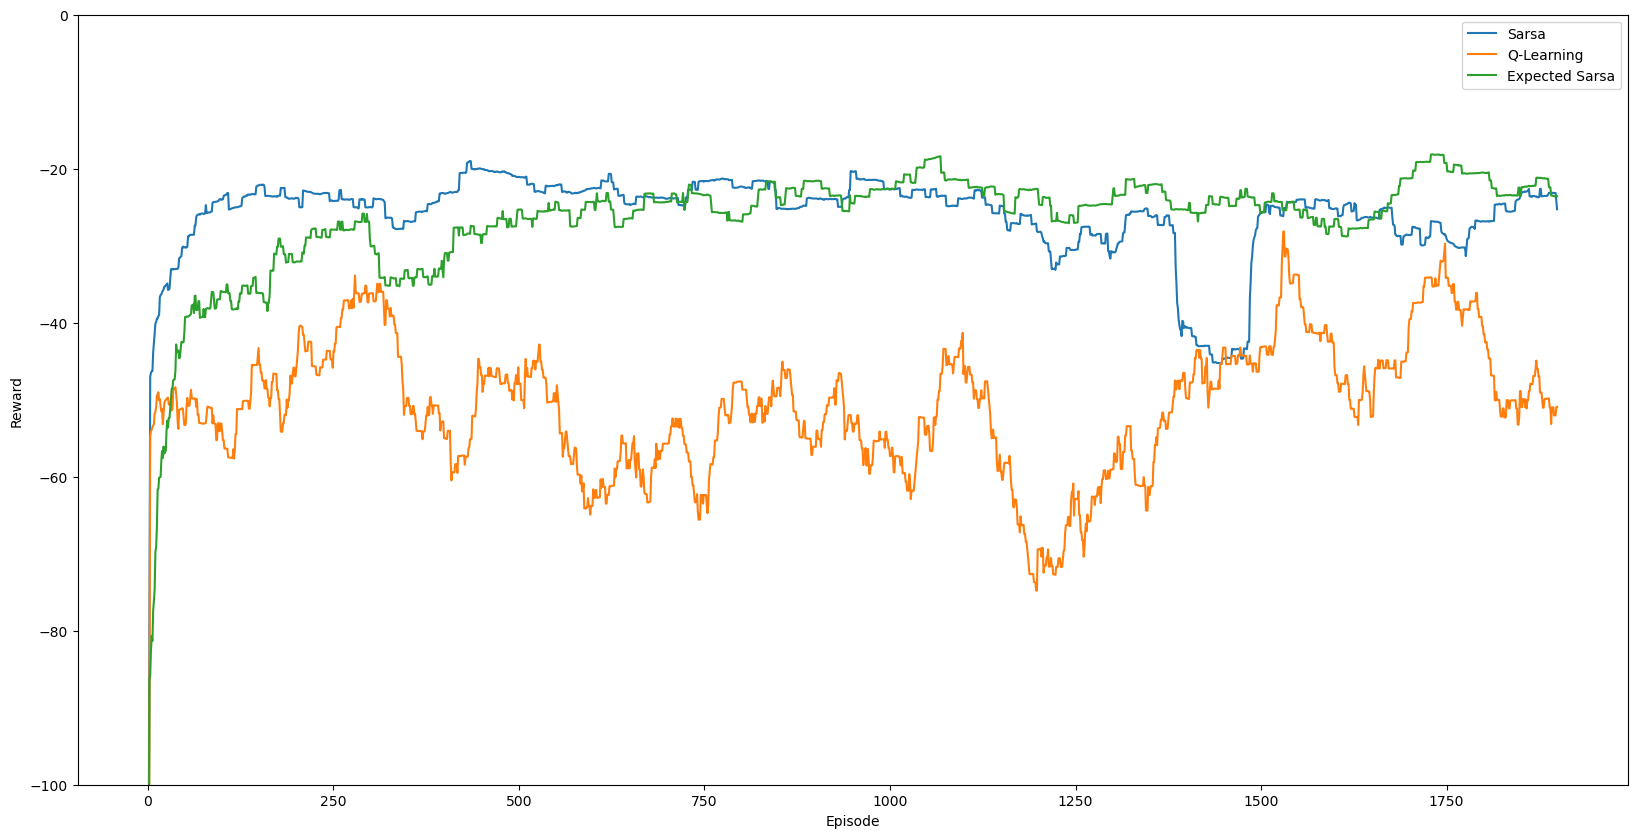

In [35]:
env = CliffWalk()
agents = [
    SarsaAgent(ALPHA, EPSILON, env),
    QLearningAgent(ALPHA, EPSILON, env),
    ExpectedSarsaAgent(ALPHA, EPSILON, env)
]

stats_arr = []
hists_arr = []
for agent in agents:
    stats, hist = run(env, agent, NUM_EPISODES)
    stats_arr.append(stats)
    hists_arr.append(hist)

plot_rewards([
    ('Sarsa', stats_arr[0]),
    ('Q-Learning', stats_arr[1]),
    ('Expected Sarsa', stats_arr[2])
])

In [36]:
for history in hists_arr:
    ani = replay(history)
    display(HTML(ani.to_jshtml()))
    plt.close()

In [19]:
NUM_EPISODES = 5000
NUM_RUNS = 10

In [21]:
env = CliffWalk()
agents = [ SarsaAgent, QLearningAgent, ExpectedSarsaAgent ]

stats = []
alphas = np.linspace(0.1, 1, 10)

for alpha in alphas:
    print(f'Alpha {alpha:.2f}', end='\r')

    alpha_stats = []
    for agent in agents:
        agent_stats = []
        for run in range(NUM_RUNS):
            agent_stats.append(train(env, agent(alpha, EPSILON, env), NUM_EPISODES))
        alpha_stats.append(np.mean(agent_stats))
    stats.append(alpha_stats)
stats = np.array(stats)

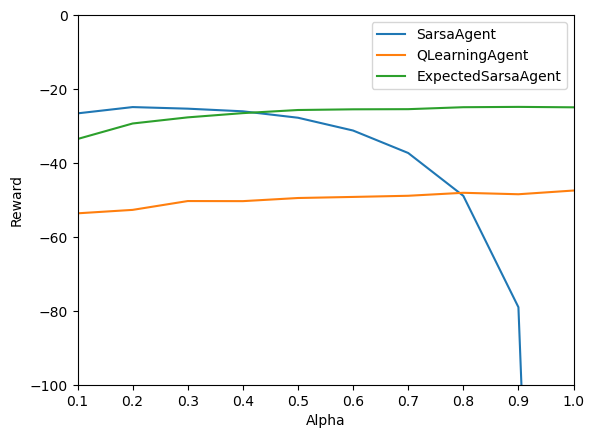

In [23]:
for i, agent in enumerate(agents):
    plt.plot(alphas, stats[:, i], label=agent.__name__)
plt.xlabel('Alpha')
plt.ylabel('Reward')
plt.xlim(0.1, 1)
plt.xticks(alphas)
plt.ylim(-100, 0)
plt.legend()
plt.show()